<a href="https://colab.research.google.com/github/Gowtham933/Traffic-Jam-object-detection-/blob/main/Code%20for%20Vehicel%20detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection from a random traffic jam image üöì

**Objective**:  Developed the project showcase how to import a image and detects how to detects objects using pre-trained AI deep learning models.

Step 1: Demonstrate the image imported from a local repo and display the image using the Pillow and matplotlib libraries.

Image path :(https://github.com/Gowtham933/Traffic-Jam-object-detection-/blob/main/traffic-jam.jpg)

In [ ]:
pip install Pillow==9.5.0

In [ ]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Define the image URL
image_url = "https://github.com/Gowtham933/Traffic-Jam-object-detection-/raw/main/traffic-jam.jpg"

# Fetch the image data
response = requests.get(image_url, stream=True)
response.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

# Open the image using Pillow
image = Image.open(BytesIO(response.raw.read()))

# Display the image (optional)
image.show()

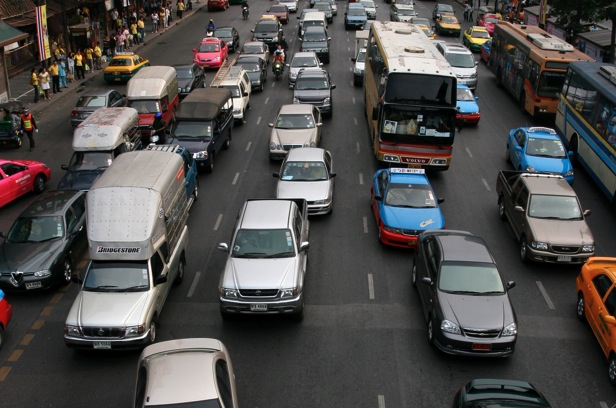

In [ ]:
#Output "displaying the image"
display(image)

Step 2: Importing the Open CV2 libray to read the image for object detection.

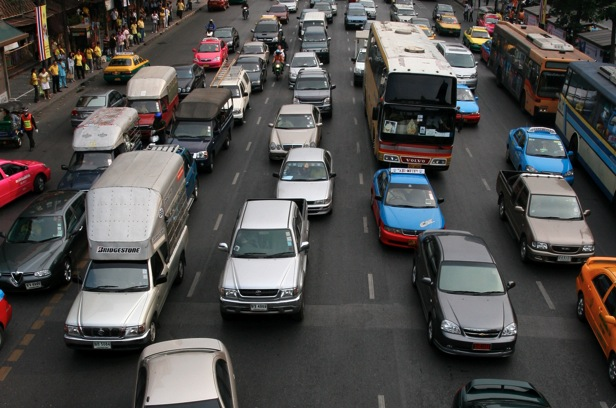

In [ ]:
import numpy as np
# Convert the PIL Image to a NumPy array
image_np = np.array(image)

# Convert the color format from RGB to BGR
traffic_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

# Use cv2_imshow instead of cv2.imshow to display the image
cv2_imshow(traffic_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

Step 3: Installing necessary lib for the porject like Open cv2, Ultralytics(YOLO) & Matplot

In [ ]:
pip install ultralytics opencv-python-headless matplotlib

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 913.6/913.6 kB 15.5 MB/s eta 0:00:00


In [ ]:
# Necessary libs
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Step 4: Loading the Pre trained Deep learnig model.
Lib : Ultralytics
Model: yolov8n ("It's a non version, fast and lightweight model")

In [ ]:
# Load the YOLOv8 model
model = YOLO('yolov8s.pt')  # can use other variants like yolov8s.pt for better accuracy


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21.5M/21.5M [00:00<00:00, 148MB/s] 


Step 5: Directing the image path

Aim: To detect the vehicals in the image

here the model create the box around the objects in the image based on it, objects will be identified.

In [ ]:
image_path = traffic_image

In [ ]:
# Perform object detection
results = model(traffic_image)

# Print detected objects
print(results[0].names)  # Get names of the detected objects


0: 448x640 3 persons, 24 cars, 4 buss, 3 trucks, 685.3ms
Speed: 24.8ms preprocess, 685.3ms inference, 32.9ms postprocess per image at shape (1, 3, 448, 640)
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58:

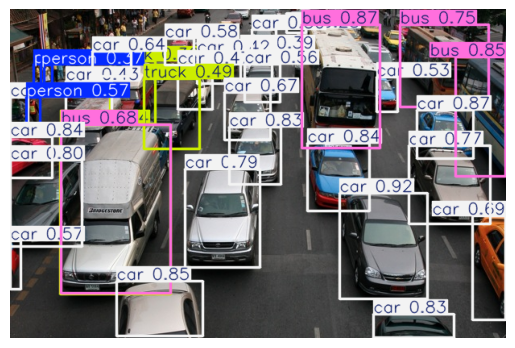

In [ ]:
# Getting the processed image with bounding boxes
result_image = results[0].plot()

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Step 5: Define the class of the object which we are looking for. Here we looking for Object(Car).

In [ ]:
for detection in results[0].boxes:
    class_id = int(detection.cls[0])  # Class ID of the detected object
    class_name = results[0].names[class_id]  # Get the name of the class
    if class_name == 'car':
        print(f"Detected it as car: {detection.conf[0]:.2f}")
    if class_name == 'bus':
        print(f"Detected it as bus: {detection.conf[0]:.2f}")

Detected it as car: 0.92
Detected it as car: 0.87
Detected it as bus: 0.87
Detected it as bus: 0.85
Detected it as car: 0.85
Detected it as car: 0.84
Detected it as car: 0.84
Detected it as car: 0.83
Detected it as car: 0.83
Detected it as car: 0.80
Detected it as car: 0.79
Detected it as car: 0.77
Detected it as bus: 0.75
Detected it as car: 0.69
Detected it as bus: 0.68
Detected it as car: 0.67
Detected it as car: 0.64
Detected it as car: 0.58
Detected it as car: 0.57
Detected it as car: 0.56
Detected it as car: 0.53
Detected it as car: 0.50
Detected it as car: 0.47
Detected it as car: 0.43
Detected it as car: 0.42
Detected it as car: 0.39
Detected it as car: 0.28
Detected it as car: 0.27


In [ ]:
# Saving the result image to a file to local repo
cv2.imwrite('car_detection_result.jpg', result_image)

True

In [ ]:
# Perform object detection
results = model(image_path)

# Initialize a counter
car_count = 0

# Loop through detections and count cars
for detection in results[0].boxes:
    class_id = int(detection.cls[0])  # Class ID of the detected object
    class_name = results[0].names[class_id]  # Get the name of the class
    if class_name == 'car':  # Check if the detected object is a car
        car_count += 1

# Print the number of cars detected
print(f"Number of cars detected: {car_count}")


0: 448x640 3 persons, 24 cars, 4 buss, 3 trucks, 480.0ms
Speed: 6.5ms preprocess, 480.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Number of cars detected: 24


Step 6:  Here for analytics I have used Pandas lib to export the results in the data frame

In [ ]:
import pandas as pd

In [ ]:
results_list = []
for detection in results[0].boxes:
    class_id = int(detection.cls[0])
    class_name = results[0].names[class_id]
    confidence = detection.conf[0].item()  # Convert tensor to float
    xmin, ymin, xmax, ymax = detection.xyxy[0].tolist()  # Convert tensor to list
    results_list.append([class_name, confidence, xmin, ymin, xmax, ymax])

In [ ]:
df = pd.DataFrame(results_list, columns=['class_name', 'confidence', 'xmin', 'ymin', 'xmax', 'ymax'])

In [ ]:
df

class_name  confidence        xmin        ymin        xmax        ymax
0         car    0.924988  409.813446  228.372833  518.979980  359.357941
1         car    0.872698  505.672363  125.630272  575.819946  185.309967
2         bus    0.867149  362.614166   19.541351  459.223816  172.216919
3         bus    0.854736  553.649109   59.441380  615.696533  207.431808
4         car    0.851576  132.247757  337.586914  239.478378  405.858337
5         car    0.840507  369.816071  166.800644  446.215668  250.111084
6         car    0.835556    0.234978  158.118118   52.255154  209.434601
7         car    0.832699  272.622314  146.825943  336.915344  217.883224
8         car    0.830862  451.914307  378.663300  551.750427  407.359100
9         car    0.799670    0.000000  187.861984   89.499359  294.775726
10        car    0.786161  217.140427  198.205307  310.563110  320.697906
11        car    0.774291  495.532410  169.479370  596.221252  266.168304
12        bus    0.748754  484.971344   19.960276  594.192383  121.100670
13        car    0.687003  574.848267  256.699554  615.784546  385.633087
14        bus    0.683709   63.363579  143.022110  199.397278  352.528015
15        car    0.669995  266.306549  103.413208  323.801636  162.015671
16        car    0.640948  102.386124   52.678867  150.153091   83.836777
17        car    0.576468  192.186111   36.292400  228.318314   69.587662
18     person    0.572145   20.448935  109.103050   37.723186  149.919571
19        car    0.569586    0.091838  287.344452   13.084907  347.865356
20        car    0.561728  291.550903   68.598053  335.065857  115.812485
21        car    0.528933  455.761414   84.967499  481.188263  127.731194
22        car    0.503178  300.674438   25.576738  330.533905   64.114815
23      truck    0.487035  166.461502   86.775269  235.235550  173.646088
24        car    0.467554  208.832443   69.807564  251.932251  124.179771
25      truck    0.436593   62.444588  143.049606  199.361099  353.238129
26        car    0.432540   69.203857   89.367531  126.436714  130.067520
27        car    0.421397  232.249817   55.319824  266.125671   92.044304
28        car    0.394339  286.511932   50.951962  325.161499   88.412476
29     person    0.373470   38.890919   69.202919   52.279167  100.222542
30      truck    0.360099  124.533981   64.898132  180.193909  142.006165
31     person    0.334837   29.825373   68.100334   42.129322  102.318504
32        car    0.276054  343.528961    5.082325  367.905334   29.914671
33        car    0.265693    0.048258  109.689636   22.145294  149.589584

Step 7: Generating the Bar graph based on object class:


In [ ]:
object_counts = df['class_name'].value_counts().sort_index()

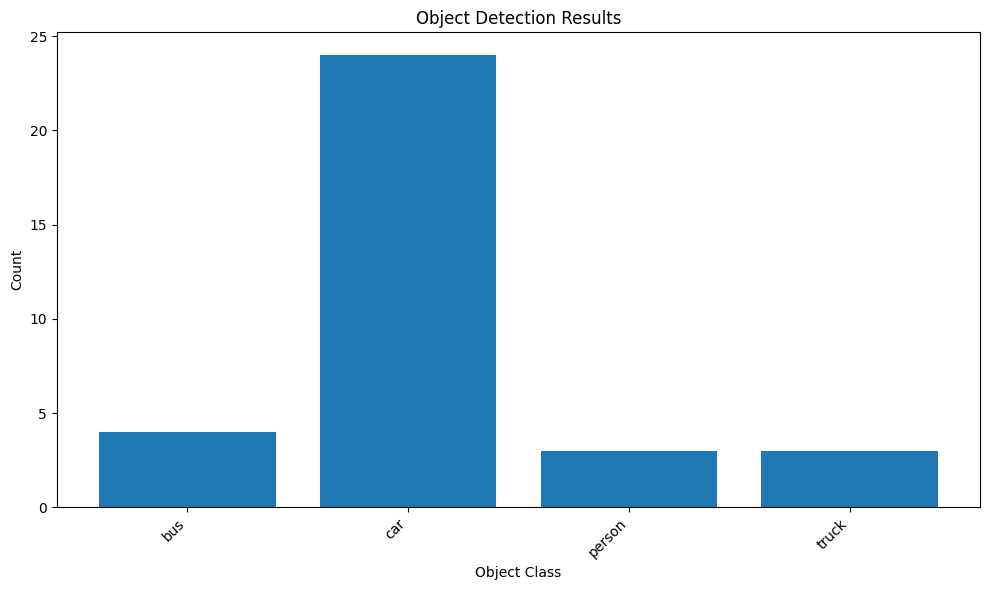

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(object_counts.index, object_counts.values)
plt.xlabel("Object Class")
plt.ylabel("Count")
plt.title("Object Detection Results")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout for better spacing
plt.show()